In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import copy

In [3]:
list_of_stocks=[]
stocknames = pd.read_csv(r"C:\Users\ajays\Desktop\Stock Price Prediction\Data\Names\Nifty50.csv")
name=np.array(stocknames)
for i in range(len(name)):
    for j in range(len(name[i])):
        list_of_stocks.append(name[i][j]+".NS")
print (list_of_stocks)
for i in list_of_stocks:
    data=yf.download(i)
    data.to_csv(f"{i}.csv")

['ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCAMC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARICO.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SHREECEM.NS', 'SBIN.NS', 'SBILIFE.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [4]:
import os
folder_path = r"C:\Users\ajays\Desktop\Stock Price Prediction\Stock data"
name=[]
files = os.listdir(folder_path)
file_paths = []
for file in files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):
        file_paths.append(file_path)
    name.append(file)
print(file_paths)
print(name)

['C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\ASIANPAINT.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\AXISBANK.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\BAJAJ-AUTO.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\BAJAJFINSV.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\BAJFINANCE.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\BHARTIARTL.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\BPCL.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\BRITANNIA.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\CIPLA.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\COALINDIA.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\DIVISLAB.NS.csv', 'C:\\Users\\ajays\\Desktop\\Stock Price Prediction\\Stock data\\DRREDDY.NS.csv', 'C:\\Users\

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [ ]:
bullish_stock = None
M=[]
yesterday=[]
for file_path in file_paths:
    data = pd.read_csv(file_path)
    relevant_features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
    X = data[relevant_features]
    y = data['Close']
    tomorrow_data = X.tail(1)
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    tomorrow_pred = model.predict(tomorrow_data)
    yesterday.append(float(tomorrow_pred))
    last_close = y.tail(1).values[0]
    profit = tomorrow_pred - last_close
    M.append(float(profit+float(tomorrow_pred)))
    print(f"Tomorrow's predicted value for {file_path}: {tomorrow_pred}")
    print(f"Last close value for {file_path}: {last_close}")
    print(f"Profit: {profit}")

In [13]:
print(yesterday)
print(M)

[3083.5132859827263, 1156.1831992219352, 9829.299233397152, 1562.3417514569005, 6654.314390505042, 1474.4227032403628, 342.75371173536575, 5751.9699181215, 1584.3231295363025, 521.1608673572237, 4660.647238686962, 6900.246203354401, 4802.739217054769, 2589.900281113273, 1677.4860336511626, 4193.600165914356, 1630.4187815078535, 687.7612531705336, 5178.5698539963705, 657.0250538436596, 2752.3617018544774, 1182.140067678278, 1362.6845052984927, 1858.2417562444502, 506.86848156702564, 915.3016522434837, 1785.3733290035811, 3560.3085982905677, 2793.9216290391687, 668.857915497351, 12195.631840881739, 2523.544074150708, 405.6092983046516, 336.77246996272663, 340.85821525906033, 2986.7630882980593, 1671.4844826237281, 822.064093166778, 24950.66971192061, 1746.2495659014116, 1182.2689919314075, 1090.762996652874, 153.33819528533144, 4459.218254893169, 1593.0826889097189, 3489.421788133365, 11412.772812007615, 560.5387948980629, 519.9819875655338]
[3091.5766207935776, 1160.3663984438704, 9885.

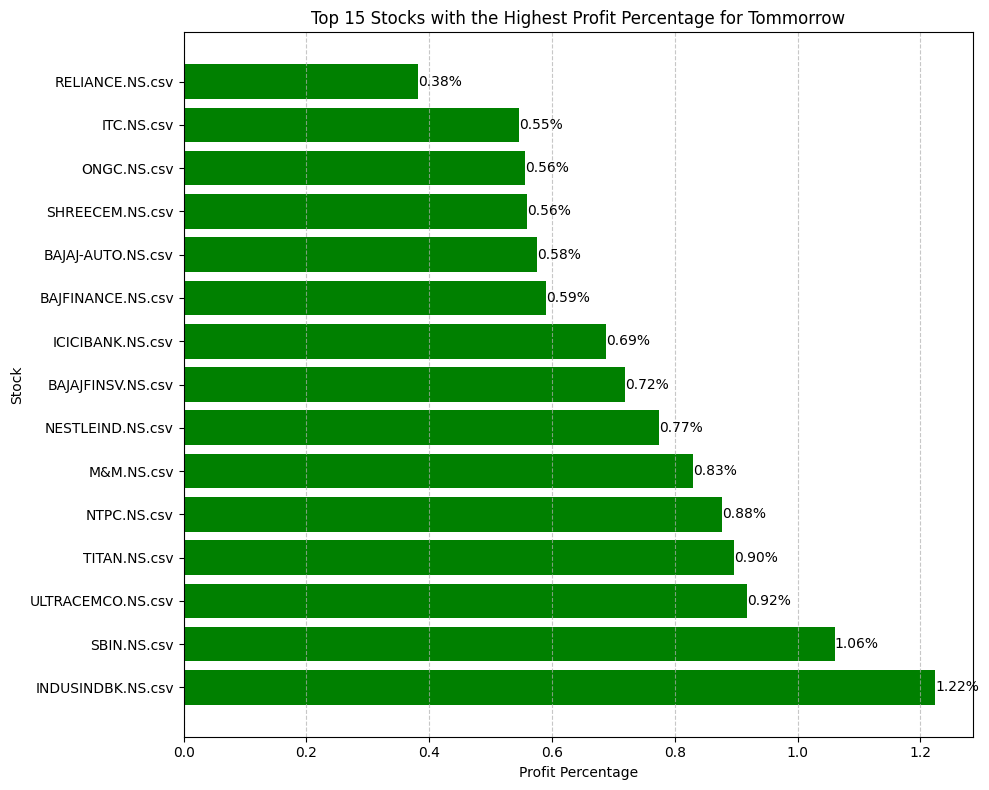

In [10]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
stocks = name # Example stock names
prices_today = M  # Example prices for each stock today
prices_yesterday = yesterday  # Example prices for each stock yesterday

# Calculate profit percentage for each stock
profit_percentages = [(today - yesterday) / yesterday * 100 for today, yesterday in zip(prices_today, prices_yesterday)]

# Sort stocks based on profit percentages and select top 15
sorted_stocks = [stock for _, stock in sorted(zip(profit_percentages, stocks), reverse=True)[:15]]
sorted_profit_percentages = sorted(profit_percentages, reverse=True)[:15]

# Create horizontal bar chart
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
bars = plt.barh(sorted_stocks, sorted_profit_percentages, color='Green')

# Add labels to the bars
for bar, percentage in zip(bars, sorted_profit_percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', va='center')

# Add labels and title
plt.xlabel('Profit Percentage')
plt.ylabel('Stock')
plt.title('Top 15 Stocks with the Highest Profit Percentage for Tommorrow')

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
